In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
botswana_data = pd.read_csv('botswana.tsv', sep='\t')
botswana_data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [4]:
botswana_data.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,2079.000000,1956.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,0.476726,20.686388,5.144683,0.516625,0.140202,0.701766,0.092911,0.275815
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,0.499515,5.002383,4.803028,0.499781,0.347236,0.457535,0.290341,0.446975
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,1.000000,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
botswana_data.religion.value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

In [6]:
botswana_data.dropna().shape

(1834, 15)

In [7]:
botswana_data['nevermarr'] = 0
botswana_data.loc[pd.isna(botswana_data.agefm), 'nevermarr'] = 1

In [8]:
botswana_data.drop('evermarr', axis=1, inplace=True)

In [9]:
botswana_data.loc[pd.isna(botswana_data.agefm), 'agefm'] = 0

In [10]:
botswana_data.loc[(botswana_data.nevermarr == 1) & (pd.isna(botswana_data.heduc)), 'heduc'] = -1

In [11]:
pd.isna(botswana_data.heduc).value_counts()

False    4238
True      123
Name: heduc, dtype: int64

In [12]:
botswana_data['idlnchld_noans'] = 0
botswana_data.loc[pd.isna(botswana_data.idlnchld), 'idlnchld_noans'] = 1

botswana_data['heduc_noans'] = 0
botswana_data.loc[pd.isna(botswana_data.heduc), 'heduc_noans'] = 1

botswana_data['usemeth_noans'] = 0
botswana_data.loc[pd.isna(botswana_data.usemeth), 'usemeth_noans'] = 1

In [13]:
botswana_data.loc[pd.isna(botswana_data.idlnchld), 'idlnchld'] = -1
botswana_data.loc[pd.isna(botswana_data.heduc), 'heduc'] = -2
botswana_data.loc[pd.isna(botswana_data.usemeth), 'usemeth'] = -1

In [14]:
botswana_data.dropna(inplace=True)
botswana_data.shape

(4348, 18)

In [15]:
botswana_data.shape[0] * botswana_data.shape[1]

78264

In [16]:
botswana_data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
m1 = smf.ols(
    'ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'
    'electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
    data=botswana_data,
)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:46:25   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

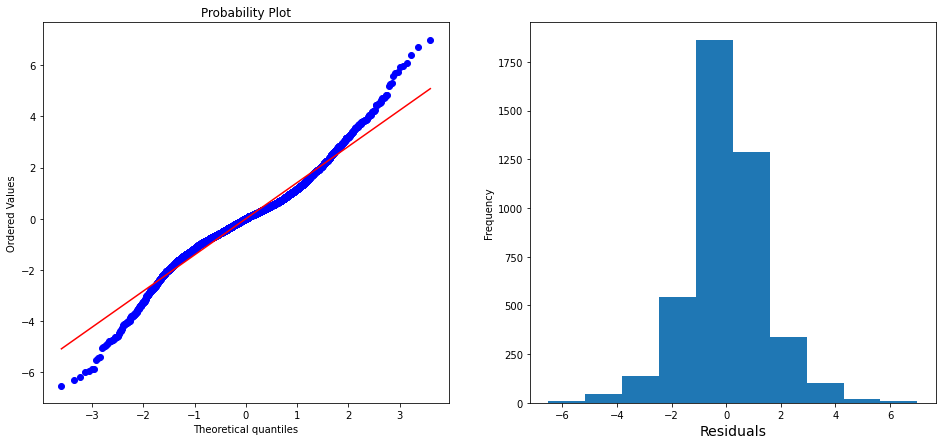

In [19]:
plt.figure(figsize(16,7))
plt.subplot(121)
stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [20]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [21]:
m2 = smf.ols(
    'ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'
    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
    data=botswana_data,
)
fitted2 = m2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:46:38   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [28]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [22]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted2.resid, fitted2.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [23]:
m3 = smf.ols(
    'ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'
    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans',
    data=botswana_data,
)
fitted3 = m3.fit(cov_type='HC1')
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:46:43   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [29]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m3.fit()))

F=0.919236, p=0.467231, k1=5.000000


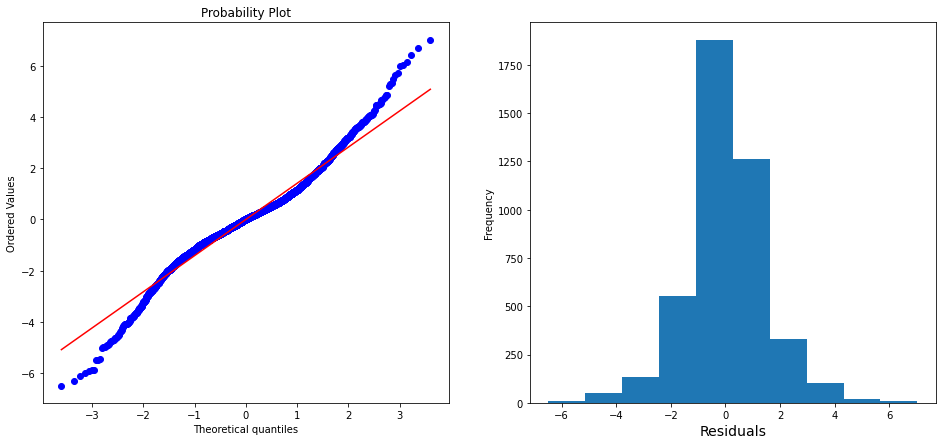

In [24]:
plt.figure(figsize(16,7))
plt.subplot(121)
stats.probplot(fitted3.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted3.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [25]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted3.resid, fitted3.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [26]:
m4 = smf.ols(
    'ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban +'
    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans',
    data=botswana_data,
)
fitted4 = m4.fit(cov_type='HC1')
print(fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:46:44   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

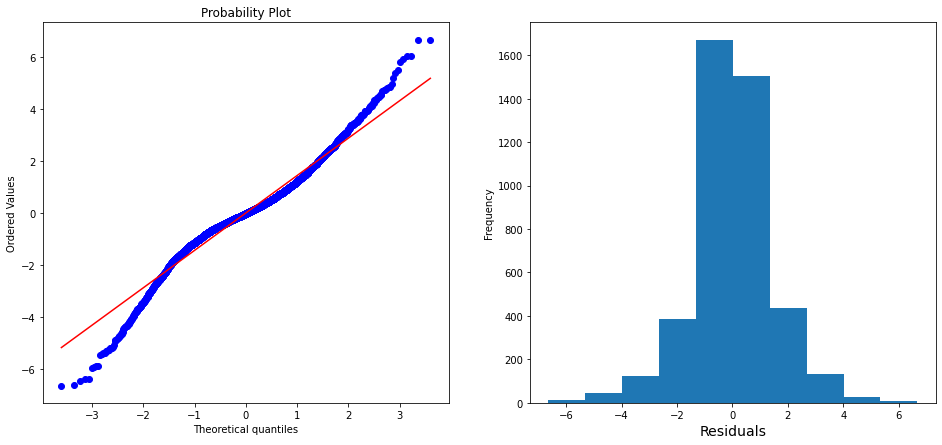

In [27]:
plt.figure(figsize(16,7))
plt.subplot(121)
stats.probplot(fitted4.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted4.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [34]:
print("F=%f, p=%s, k1=%f" % m3.fit().compare_f_test(m4.fit()))

F=92.890582, p=3.155200948066359e-40, k1=2.000000
